In [1]:
!nrnivmodl /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod
from neuron import h
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from neuron.units import ms, mV
import plotly.io as pio
from matplotlib import pyplot, cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
from multiprocessing import Pool
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}
# 自定义刻度标签显示格式


h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/morphologies/cell1.asc"
biophysicalModelFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)
import sys
sys.path.append('/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron')
from common_function import exp_fitting, plot_curve

/home/wzl/anaconda/envs/neuron9/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
INFO : Using neuron-nightly Package (Developer Version)
/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron
cfiles =
Mod files: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/CaDynamics_E2.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_HVA.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_LVAst.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/epsp.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ih.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Im.mod" "/home/wzl/LFPy/project/conductance_measurement/real

--No graphics will be displayed.


In [2]:
from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,color='black',title='',linewidth=2, linestyle='-',xlim=[0,100],
               dx=20, ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', 
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1, facecolors='none',
               nonscatter=True, s0=10, facecolor='none', zorder=2):
    if nonscatter:
        if color:
            ax2.plot(x,y,color=color,linewidth=linewidth,linestyle=linestyle,alpha=alpha, label=label, zorder=zorder)
        else:
            ax2.plot(x,y,linewidth=linewidth,alpha=alpha, linestyle=linestyle,label=label, zorder=zorder)
    else:
        if color:
            ax2.scatter(x,y,edgecolors=color,facecolors = facecolor, alpha=alpha, 
                        label=label, s=s0, zorder=zorder)
        else:
            ax2.scatter(x,y, alpha=alpha, label=label,
                        s=s0, zorder=zorder)
        
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
        # ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if xlim:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=fontsize,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=fontsize,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')


In [3]:
run_dt = 0.1
fE = 6e-3
fI = 15*1e-3
C=0.00024
GL = 1.93e-05
locE = 58
locI = 37
locationE ='dend'
locationI ='dend'
    
L5PC = h.L5PCtemplate(morphologyFilename)
    
h.dt = run_dt
h.tstop = 600.

h.v_init = -76.3
Vclamp_init = -76.3
recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)

# Initialize an excitatory and inhibitory synaptic input
# make a new stimulator
stimE = h.NetStim()
stimI = h.NetStim()

if locationE == 'dend':
    synE = h.Exp2Syn(L5PC.dend[int(locE)](0.5))
if locationE == 'apic':
    synE = h.Exp2Syn(L5PC.apic[int(locE)](0.5))
if locationE == 'soma':
    synE = h.Exp2Syn(L5PC.soma[0](0.5))

if locationI == 'dend':
    synI = h.Exp2Syn(L5PC.dend[int(locI)](0.5))
if locationI == 'apic':
    synI = h.Exp2Syn(L5PC.apic[int(locI)](0.5))
if locationI == 'soma':
    synI = h.Exp2Syn(L5PC.soma[0](0.5))
synE.tau1 = 1.  # ms
synE.tau2 = 5.  # ms
synI.tau1 = 1.  # ms
synI.tau2 = 5.  # ms

synE.e = 0.  # mV for E input and -80 for I input 
synI.e = -100.
    
stimE.number = 1
stimE.start = h.tstop - 100.  # ms
stimI.number = 1
stimI.start = h.tstop - 100.  # ms
ncstimE = h.NetCon(stimE, synE)
ncstimE.delay = 0.
ncstimE.weight[0] = 0e-2  # uS
ncstimI = h.NetCon(stimI, synI)
ncstimI.delay = 0.
ncstimI.weight[0] = 0e-2  # uS


# Initialize voltage clamp
vclamp = h.SEClamp(L5PC.soma[0](0.5))
vclamp.amp1 = Vclamp_init
vclamp.dur1 = h.tstop
vclamp.dur2 = h.tstop
vclamp.amp2 = Vclamp_init - 20.

irec = h.Vector()
irec.record(vclamp._ref_i)

# Function to initialize the simulation
def initialize():
    h.t = 0
    h.finitialize(h.v_init)
    h.fcurrent()

# Function to integrate the simulation
def integrate():
    while h.t < h.tstop:
        h.fadvance()

# Function to run the simulation
def go():
    initialize()
    integrate()


Vclamp = np.arange(-110.,-60.,10)
tstart = int(stimI.start/run_dt+1)

V_rest = -76.3
epsilonE = 0. - V_rest
epsilonI = -100. - V_rest
epsilonI1 = -120. - V_rest

#  pure E for the estimation of true GE_est
vclamp.dur1 = 0.
vclamp.dur2 = 0.
vclamp.dur3 = 0.
ncstimE.weight[0] = fE
ncstimI.weight[0] = 0.
go()
recvE0 = np.array(recv.to_python())
recvE0_norm = recvE0[tstart:tstart+1000] - V_rest
dVdtE = np.diff(recvE0_norm)/run_dt
dVdtE = np.append(dVdtE, 0)
GE_est = (C*dVdtE + GL*recvE0_norm)/(epsilonE - recvE0_norm)

#  pure I input for the estimation of GI_est
vclamp.dur1 = 0.
vclamp.dur2 = 0.
vclamp.dur3 = 0.
ncstimE.weight[0] = 0.
ncstimI.weight[0] = fI
go()
recvI0 = np.array(recv.to_python())
recvI0_norm = recvI0[tstart:tstart+1000] - V_rest
dVdtI = np.diff(recvI0_norm)/run_dt
dVdtI = np.append(dVdtI, 0)
GI_est = (C*dVdtI + GL*recvI0_norm)/(epsilonI - recvI0_norm)


Isyn_inj_t = np.zeros((len(Vclamp),1000))
Isyn_epsilonI1_inj_t = np.zeros((len(Vclamp),1000))



for i in range(len(Vclamp)):
    ncstimE.weight[0] = 0.
    ncstimI.weight[0] = 0.
    vclamp.amp1 = Vclamp[i]
    vclamp.dur1 = h.tstop
    h.v_init = V_rest
    go()
    Iinj0 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
    
    synE.e = 0.
    synI.e = -100.
    ncstimE.weight[0] = fE
    ncstimI.weight[0] = fI
    vclamp.amp1 = Vclamp[i]
    vclamp.dur1 = h.tstop
    h.v_init = V_rest
    go()
    Iinj1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
    Isyn = (Iinj1[tstart:tstart+1000] - Iinj0[tstart:tstart+1000])
    Isyn_inj_t[i,:] = Isyn
    
    synE.e = 0.
    synI.e = -120.
    ncstimE.weight[0] = fE
    ncstimI.weight[0] = fI
    vclamp.amp1 = Vclamp[i]
    vclamp.dur1 = h.tstop
    h.v_init = V_rest
    go()
    Iinj1_epsilonI1 = np.array(irec.to_python())  # Assuming irec is a NEURON Vector
    Isyn_epsilonI1 =  (Iinj1_epsilonI1[tstart:tstart+1000] - Iinj0[tstart:tstart+1000])
    Isyn_epsilonI1_inj_t[i,:] = Isyn_epsilonI1
    
                                                    
traditional_effective_conductance = np.zeros((2,1000))
intercept_effective_conductance = np.zeros((2,1000))
A = np.ones((len(Vclamp),2))
A[:,0] = Vclamp - V_rest
epsilonE = 0. - V_rest
epsilonI = -100. - V_rest
epsilonI1 = -120. - V_rest
for i in range(1000):
    x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj_t[:,i], 
                                                            rcond=None)
    x_epsilonI1, residuals, rank, singular_values = np.linalg.lstsq(A, 
                        Isyn_epsilonI1_inj_t[:,i], rcond=None)
    
    traditional_effective_conductance[1, i] = (x[0]*epsilonE + x[1])/(epsilonE - epsilonI)
    traditional_effective_conductance[0, i] = (x[0]*epsilonI + x[1])/(epsilonI - epsilonE)
    
    intercept_effective_conductance[1,i] = (x[1] - x_epsilonI1[1])/(epsilonI1 - epsilonI)
    intercept_effective_conductance[0,i] = (-intercept_effective_conductance[1,i]*epsilonI - x[1])/epsilonE

In [4]:
print(epsilonE)
print(epsilonI)
print(epsilonI1)

76.3
-23.700000000000003
-43.7


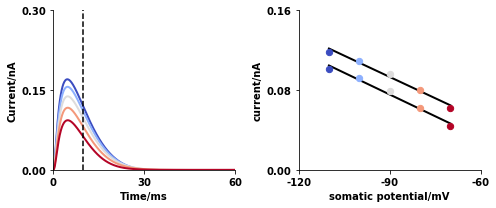

In [8]:
def model(x, a, b):
    return a*x+b

from matplotlib.cm import ScalarMappable
time = np.linspace(0,100, np.shape(Isyn_inj_t)[1])
# 定义一个颜色映射，根据Vclamp值映射颜色
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(Vclamp.min(), Vclamp.max())
sm = ScalarMappable(norm=norm, cmap=cmap)

fig, ax2 = plt.subplots(1,2, figsize = (7,3.))


for i in range(len(Vclamp)):
    color = sm.to_rgba(Vclamp[i])  # 使用Vclamp值对应的颜色
    plot_curve(ax2[0], time, -Isyn_inj_t[i,:],color=color,linewidth=2, 
    xlim=[0,60],dx=30, ylim=[0,0.3], dy=0.15, ynum_decimals=2, ylabel='Current/nA',)
    plot_curve(ax2[1], Vclamp[i], -Isyn_inj_t[i,100],color=color, facecolor=color,
               xlabel='somatic potential/mV',xlim=[-120,-60],dx=55, ylim=[0,0.3], dy=0.15,
               ynum_decimals=0,s0=40, ylabel='mean current/pA',nonscatter=False, zorder=3)
    plot_curve(ax2[1], Vclamp[i], -Isyn_epsilonI1_inj_t[i,100],color=color, facecolor=color,
               xlabel='somatic potential/mV',xlim=[-120,-60],dx=55, ylim=[0,0.3], dy=0.15,
               ynum_decimals=0, s0=40, ylabel='mean current/pA',nonscatter=False, zorder=3)


ax2[0].axvline(x=10, color='black', linestyle='--', linewidth=1.5)
v = np.linspace(Vclamp[0],Vclamp[-1],100)
x, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_inj_t[:,100], 
                                                            rcond=None)
x_epsilonI1, residuals, rank, singular_values = np.linalg.lstsq(A, Isyn_epsilonI1_inj_t[:,100], 
                                                            rcond=None)
y = x[0]*(v-V_rest) + x[1]
y_epsilonI1 = x_epsilonI1[0]*(v-V_rest) + x_epsilonI1[1]
plot_curve(ax2[1],v, -y, color='black', xlim=[-120,-60], dx=30,xlabel='somatic potential/mV',
                ylim=[0,0.3], dy=0.15, ynum_decimals=2,s0=40, ylabel='current/nA', zorder=1)  
plot_curve(ax2[1],v, -y_epsilonI1, color='black', xlim=[-120,-60], dx=30,xlabel='somatic potential/mV',
                ylim=[0,0.16], dy=0.08, ynum_decimals=2,s0=40, ylabel='current/nA', zorder=1)   

# # 添加colorbar
# cbar = plt.colorbar(sm, ax=ax2[1])
# cbar.set_label('somatic potential/mV',fontsize=10,weight='bold')
plt.tight_layout()
plt.savefig('flow_diagram_eff_cond.eps', format='eps')


In [9]:
var = Isyn_inj_t
print(np.min(var), np.max(var))

-0.19532750626419215 0.0
